Proje için kütüphanelerimizi import edelim

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np
import pandas as pd
import copy

Data yolarımızı belirleyelim

In [2]:
Train_root="/Users/abdulbarisoylemez/Desktop/ExplainableShoesProject/Shoes/train"
Test_root="/Users/abdulbarisoylemez/Desktop/ExplainableShoesProject/Shoes/test"

Veri setlerini PyTorch ile işlemek için dönüşüm yapalım


In [3]:
Train_dataset=torchvision.datasets.ImageFolder(root=Train_root)
Test_dataset=torchvision.datasets.ImageFolder(root=Test_root)

Modelimizi oluşturalım

In [4]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.vgg16 = models.vgg16(pretrained=True)
        num_features = self.vgg16.classifier[6].in_features
        self.vgg16.classifier[6] = nn.Linear(num_features, 3)
    def forward(self, x):
        x = self.vgg16(x)
        return x

Modelimizi görseleştirelim

In [5]:
model=CNNModel()
model

/Users/abdulbarisoylemez/anaconda3/envs/explainable/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/abdulbarisoylemez/anaconda3/envs/explainable/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


CNNModel(
  (vgg16): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16):

Önceden eğitilmiş model için veri hazırlayalım

In [38]:
Train_dataset=torchvision.datasets.ImageFolder(
     root=Train_root,
     transform=transforms.Compose([
          transforms.Resize((255,255)),
          transforms.ToTensor()
     ])
)

Test_dataset=torchvision.datasets.ImageFolder(
     root=Test_root,
     transform=transforms.Compose([
          transforms.Resize((255,255)),
          transforms.ToTensor()
     ])
)

Veriyi toplu halde işelemek için veriyi düzenliyelim

In [40]:
batch_size=32
Train_loader=torch.utils.data.DataLoader(
     Train_dataset,batch_size=batch_size,shuffle=True
)

Test_loader=torch.utils.data.DataLoader(
     Test_dataset,batch_size=batch_size,shuffle=True
)

Modeli eğitim kısmına geçelim

In [41]:
# Cross-entropy loss fonksiyonu oluşturuluyor
cross_entropy_loss = nn.CrossEntropyLoss()
# Model için Adam optimizer oluşturuluyor
optimizer = optim.Adam(model.parameters(), lr=0.0001)
epochs=20

In [42]:
import time

for epoch in range(epochs):
    start_time = time.time()

    for i, batch in enumerate(Train_loader, 0):
        # Veri yükleyicisinden girişler ve etiketler alınıyor
        inputs, labels = batch
        
        # Gradyanları sıfırlama
        optimizer.zero_grad()
         # Girişler üzerinden model tahmini yapılıyor
        outputs = model(inputs)
        # Kayıp değeri hesaplanıyor
        loss = cross_entropy_loss(outputs, labels)
        # Geriye doğru yayılım
        loss.backward()
        #Optimizasyon adımı
        optimizer.step()


    # Epoch süresini yazdırma
    end_time = time.time()
    epoch_time = end_time - start_time
    print(f"Epoch {epoch+1} completed in {epoch_time:.2f} seconds.  Loss val {loss.item():.6f}")


/Users/abdulbarisoylemez/anaconda3/envs/explainable/lib/python3.10/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1 completed in 374.66 seconds.  Loss val 0.000501
Epoch 2 completed in 375.52 seconds.  Loss val 0.000018
Epoch 3 completed in 371.94 seconds.  Loss val 0.000093
Epoch 4 completed in 385.91 seconds.  Loss val 0.000000
Epoch 5 completed in 385.82 seconds.  Loss val 0.003561
Epoch 6 completed in 389.03 seconds.  Loss val 0.000110
Epoch 7 completed in 402.36 seconds.  Loss val 0.003598
Epoch 8 completed in 406.26 seconds.  Loss val 0.000003
Epoch 9 completed in 423.08 seconds.  Loss val 0.000007
Epoch 10 completed in 407.38 seconds.  Loss val 0.000000
Epoch 11 completed in 407.02 seconds.  Loss val 0.000014
Epoch 12 completed in 405.99 seconds.  Loss val 0.000001
Epoch 13 completed in 423.19 seconds.  Loss val 0.000000
Epoch 14 completed in 412.53 seconds.  Loss val 0.000007
Epoch 15 completed in 411.49 seconds.  Loss val 0.000000
Epoch 16 completed in 417.00 seconds.  Loss val 0.000002
Epoch 17 completed in 419.44 seconds.  Loss val 0.000000
Epoch 18 completed in 408.35 seconds.  L

Modelimizi kaydedelim

In [ ]:
# Modelin eğitimi tamamlandıktan sonra kaydedilmesi
torch.save(model.state_dict(), "model.pth")

Model başarımına bakalım , test veri kümesi üzerindeki başarısına

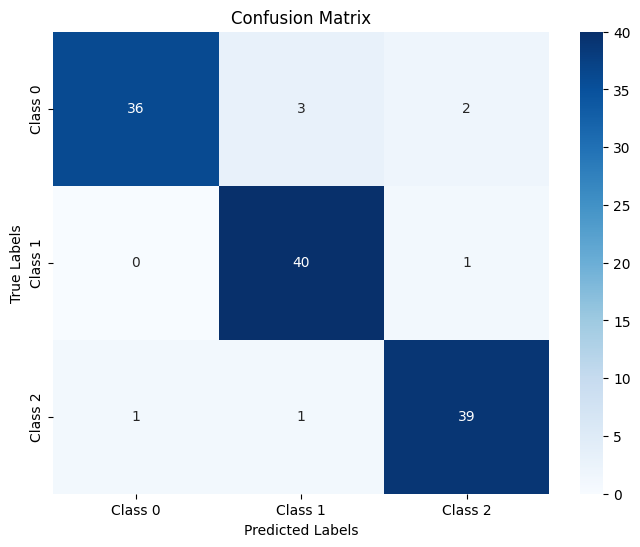

Model Doğruluğu: 0.9349593495934959


In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Test veri kümesinden tüm girişlerin ve etiketlerin alınması
all_inputs = []
all_labels = []

for inputs, labels in Test_loader:
    all_inputs.append(inputs)
    all_labels.append(labels.numpy())

all_inputs = torch.cat(all_inputs, dim=0)
all_labels = np.concatenate(all_labels)

# Tüm girişlerin model üzerinden geçirilmesi ve tahmin edilen çıkışların elde edilmesi
all_outputs = model(all_inputs).max(1).indices.detach().cpu().numpy()

# Confusion matrix hesaplanması
cm = confusion_matrix(all_labels, all_outputs)

# Confusion matrix'in seaborn ile görselleştirilmesi
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Doğruluk hesaplanması
accuracy = np.trace(cm) / float(np.sum(cm))
print("Model Doğruluğu:", accuracy)


Bir katmanı kopyalar ve parametrelerini g fonksiyonundan geçirir

In [97]:
def new_layer(layer, g):
    """
    Bir katmanı kopyalar ve parametrelerini g fonksiyonundan geçirir.

    Args:
        layer (torch.nn.Module): Kopyalanacak katman.
        g (function): Parametreleri geçirmek için kullanılacak işlev.

    Returns:
        torch.nn.Module: Kopyalanan katmanın, g işlevinden geçirilmiş parametreleriyle birlikte kopyası.
    """
    layer = copy.deepcopy(layer)  # Katmanı derinlemesine kopyala
    try:
        layer.weight = torch.nn.Parameter(g(layer.weight))  # Ağırlıkları g işlevine geçir
    except AttributeError:
        pass
    try:
        layer.bias = torch.nn.Parameter(g(layer.bias))  # Bias'ı g işlevine geçir
    except AttributeError:
        pass
    return layer  # Yeniden oluşturulan katmanı döndür


Yoğun bir katmanı bir evrişim katmanına dönüştürür

In [98]:
def dense_to_conv(layers):
    """
    Yoğun bir katmanı bir evrişim katmanına dönüştürür.

    Args:
        layers (list): Katmanların listesi.

    Returns:
        list: Dönüştürülmüş katmanların listesi.
    """
    newlayers = []  # Yeni katmanların listesi
    for i, layer in enumerate(layers):  # Her bir katman için döngü
        if isinstance(layer, nn.Linear):  # Katman bir yoğun katman mı kontrol et
            newlayer = None
            if i == 0:  # İlk katman ise
                m, n = 512, layer.weight.shape[0]  # Giriş ve çıkış boyutlarını al
                newlayer = nn.Conv2d(m, n, 7)  # Evrişim katmanı oluştur
                newlayer.weight = nn.Parameter(layer.weight.reshape(n, m, 7, 7))  # Ağırlıkları yeniden şekillendir
            else:
                m, n = layer.weight.shape[1], layer.weight.shape[0]  # Giriş ve çıkış boyutlarını al
                newlayer = nn.Conv2d(m, n, 1)  # Evrişim katmanı oluştur
                newlayer.weight = nn.Parameter(layer.weight.reshape(n, m, 1, 1))  # Ağırlıkları yeniden şekillendir
            newlayer.bias = nn.Parameter(layer.bias)  # Bias parametresini ata
            newlayers += [newlayer]  # Yeni katmanı listeye ekle
        else:
            newlayers += [layer]  # Yoğun katman değilse, orijinal katmanı listeye ekle
    return newlayers  # Dönüştürülmüş katmanların listesini döndür


modeldeki tam bağlantılı katmanların (fully connected layers) indekslerini alır

In [100]:
def get_linear_layer_indices(model):
    """
    Modeldeki tam bağlantılı katmanların (fully connected layers) indekslerini alır.

    Args:
        model: PyTorch modeli.

    Returns:
        list: Tam bağlantılı katmanların indeksleri.
    """
    offset = len(model.vgg16._modules['features']) + 1  # Dizine erişmek için bir ofset hesapla
    indices = []  # İndekslerin listesi
    for i, layer in enumerate(model.vgg16._modules['classifier']):  # Sınıflandırıcı katmanları döngüye al
        if isinstance(layer, nn.Linear):  # Katman bir tam bağlantılı katman mı kontrol et
            indices.append(i)  # Eğer öyleyse, indeksi listeye ekle
    indices = [offset + val for val in indices]  # Ofseti uygula
    return indices  # Tam bağlantılı katmanların indekslerini döndür


Bu algoritma, modelin aktivasyonlarını geriye doğru geçirerek ve katmanlarda belirli bir kurallara göre yeniden hesaplayarak, modelin çıktısının ne kadarının hangi girdilere dayandığını anlamak için kullanılır

In [60]:
def apply_lrp_on_vgg16(model, image):
    """
    Modelin LRP (Layer-wise Relevance Propagation) işlemini uygulayarak bir görüntünün anlam değerlerini hesaplar.

    Args:
        model: LRP işlemi uygulanacak PyTorch modeli.
        image: Anlam değerleri hesaplanacak görüntü.

    Returns:
        list: Görüntünün her katmandaki anlam değerlerini içeren liste.
    """
    image = torch.unsqueeze(image, 0)  # Görüntüyü tek boyutlu hale getir
    # >>> Adım 1: Katmanları çıkar
    layers = list(model.vgg16._modules['features']) \
                + [model.vgg16._modules['avgpool']] \
                + dense_to_conv(list(model.vgg16._modules['classifier'])))  # Katmanları listeye ekle
    linear_layer_indices = get_linear_layer_indices(model)  # Tam bağlantılı katmanların indekslerini al
    # >>> Adım 2: Görüntüyü katmanlardan geçir ve aktivasyonları sakla
    n_layers = len(layers)  # Katman sayısını hesapla
    activations = [image] + [None] * n_layers  # Aktivasyonları saklamak için liste oluştur
    
    for layer in range(n_layers):  # Her bir katman için
        if layer in linear_layer_indices:  # Eğer katman tam bağlantılı katmanlardan biriyse
            if layer == 32:  # 32. katmanı kontrol et
                activations[layer] = activations[layer].reshape((1, 512, 7, 7))  # Boyutları yeniden şekillendir
        activation = layers[layer].forward(activations[layer])  # Aktivasyonu hesapla
        if isinstance(layers[layer], torch.nn.modules.pooling.AdaptiveAvgPool2d):  # Katmanın türünü kontrol et
            activation = torch.flatten(activation, start_dim=1)  # Aktivasyonu düzleştir
        activations[layer+1] = activation  # Aktivasyonu sakla

    # >>> Adım 3: Son katmanı tek-sıcak-kodlamayla değiştir
    output_activation = activations[-1].detach().cpu().numpy()  # Çıkış aktivasyonunu numpy dizisine dönüştür
    max_activation = output_activation.max()  # Maksimum aktivasyonu bul
    one_hot_output = [val if val == max_activation else 0  # Tek-sıcak-kodlamayı uygula
                      for val in output_activation[0]]

    activations[-1] = torch.FloatTensor([one_hot_output])  # Aktivasyonları güncelle

    # >>> Adım 4: Anlam değerlerini geriye doğru yay
    relevances = [None] * n_layers + [activations[-1]]  # Anlam değerlerini saklamak için liste oluştur
    # Katmanları ters sırayla döngüye al
    for layer in range(0, n_layers)[::-1]:
        current = layers[layer]  # Mevcut katmanı seç
        if isinstance(current, torch.nn.MaxPool2d):  # Eğer katman bir maksimum havuzlama katmanıysa
            layers[layer] = torch.nn.AvgPool2d(2)  # Katmanı ortalama havuzlama katmanı olarak işaretle
            current = layers[layer]  # Mevcut katmanı güncelle
        if isinstance(current, torch.nn.Conv2d) or \
           isinstance(current, torch.nn.AvgPool2d) or \
           isinstance(current, torch.nn.Linear):  # Eğer katman bir evrişim, ortalama havuzlama veya tam bağlantılı katman ise
            activations[layer] = activations[layer].data.requires_grad_(True)  # Aktivasyonları gerektirir
            # Katmanın derinliğine bağlı olarak LRP'nin çeşitli varyantlarını uygula
            if layer <= 16:       rho = lambda p: p + 0.25*p.clamp(min=0); incr = lambda z: z+1e-9  # Alt katmanlar için
            if 17 <= layer <= 30: rho = lambda p: p;                       incr = lambda z: z+1e-9+0.25*((z**2).mean()**.5).data  # Orta katmanlar için
            if layer >= 31:       rho = lambda p: p;                       incr = lambda z: z+1e-9  # Üst katmanlar için
            
            z = incr(new_layer(layers[layer], rho).forward(activations[layer]))  # Ağırlıkları dönüştür ve ileri geçiş yap
            s = (relevances[layer+1]/z).data  # Sonraki katmandaki anlam değerleri ile z arasında öğrenme oranı hesapla
            (z * s).sum().backward()  # Gradyanı hesapla
            c = activations[layer].grad  # Yeni anlam değerlerini atama
            relevances[layer] = (activations[layer]*c).data  # Yeni anlam değerlerini güncelle
        else:
            relevances[layer] = relevances[layer+1]  # Mevcut katmanın anlam değerlerini güncelle

    # >>> Potansiyel Adım 5: Pikseller için farklı yayılma kuralı uygula
    return relevances[0]  # Anlam değerlerini döndür


Modelin hangi indexlere bakarak tespit etiğine bakalım

/var/folders/7m/ml2l2z8s1mv3tkbmb_ftbp240000gn/T/ipykernel_1086/3805255370.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  activations[-1] = torch.FloatTensor([one_hot_output])


Bu görüntünün Gerçek Etiketi:  nike


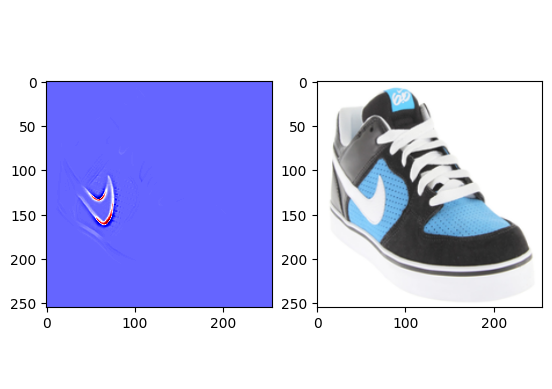

In [101]:
# İlgili görüntünün indisini belirle
image_id = 21

# Modelden, ilgili görüntü üzerindeki anlam değerlerini hesapla
image_relevances = apply_lrp_on_vgg16(model, inputs[image_id])

# Anlam değerlerini tensörden NumPy dizisine dönüştür, permütasyon uygula ve normalleştir
image_relevances = image_relevances.permute(0, 2, 3, 1).detach().cpu().numpy()[0]
image_relevances = np.interp(image_relevances, (image_relevances.min(), image_relevances.max()), (0, 1))

# Gerçek etiketi bul
pred_label = list(Test_dataset.class_to_idx.keys())[list(Test_dataset.class_to_idx.values()).index(labels[image_id])]

# Eğer model doğru sınıflandırmışsa, gerçek etiketi ve anlam değerlerini görüntüler
if outputs[image_id] == labels[image_id]:
    print("Bu görüntünün Gerçek Etiketi: ", pred_label)

    # Görüntüleri yan yana göster
    plt.axis('off')
    plt.subplot(1, 2, 1)
    plt.imshow(image_relevances[:, :, 0], cmap="seismic")  # Anlam değerlerini göster
    plt.subplot(1, 2, 2)
    plt.imshow(inputs[image_id].permute(1, 2, 0).detach().cpu().numpy())  # Giriş görüntüsünü göster
    plt.show()
else:
    print("Bu görüntü doğru şekilde sınıflandırılmamış.")


Farklı 3 değer içinde deniyelim

/var/folders/7m/ml2l2z8s1mv3tkbmb_ftbp240000gn/T/ipykernel_1086/3805255370.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  activations[-1] = torch.FloatTensor([one_hot_output])


Görüntünün Gerçek Etiketi (3. görüntü):  adidas


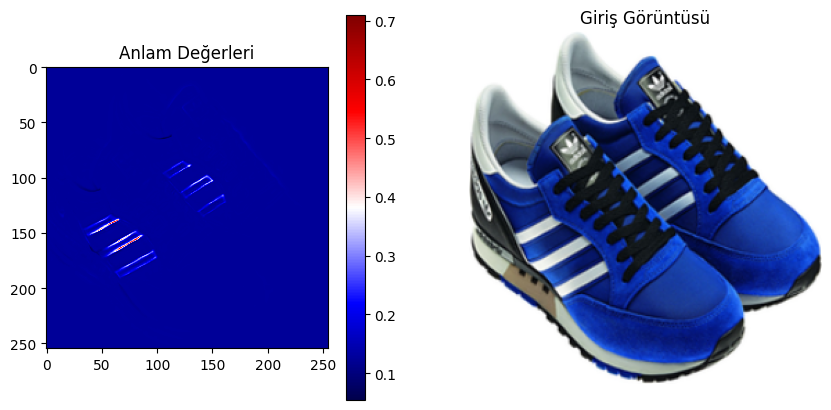

Görüntünün Gerçek Etiketi (10. görüntü):  nike


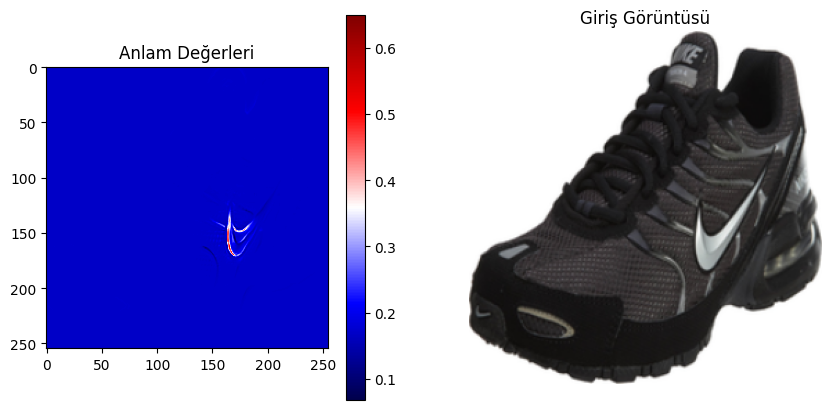

Görüntünün Gerçek Etiketi (14. görüntü):  nike


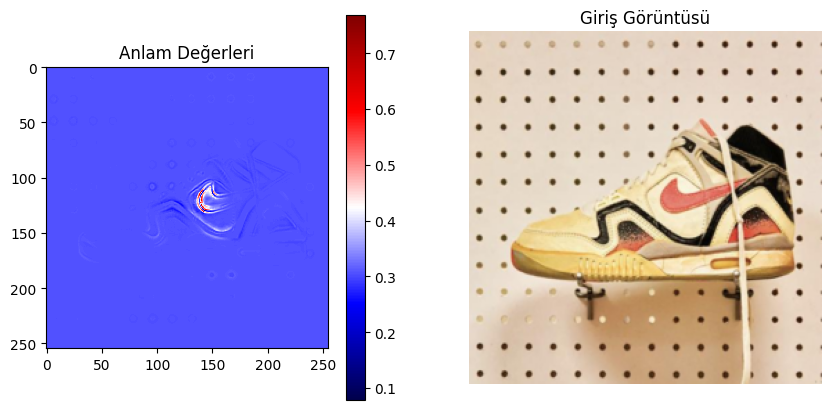

In [96]:
# Belirli indekslere sahip görüntülerin indekslerini belirle
selected_indices = [2,9,13]
# Her bir seçilen indeks için anlam değerlerini hesapla ve görselleştir
for image_id in selected_indices:
    # Modelden, ilgili görüntü üzerindeki anlam değerlerini hesapla
    image_relevances = apply_lrp_on_vgg16(model, inputs[image_id])

    # Anlam değerlerini tensörden NumPy dizisine dönüştür, permütasyon uygula ve normalleştir
    image_relevances = image_relevances.permute(0, 2, 3, 1).detach().cpu().numpy()[0]
    image_relevances = np.interp(image_relevances, (image_relevances.min(), image_relevances.max()), (0, 1))

    # Tahmin edilen sınıf etiketini bul
    pred_label = list(Test_dataset.class_to_idx.keys())[
                 list(Test_dataset.class_to_idx.values())
                 .index(labels[image_id])]

    # Eğer model doğru sınıflandırmışsa, anlam değerlerini ve girdi görüntüsünü yan yana göster
    if outputs[image_id] == labels[image_id]:
        print(f"Görüntünün Gerçek Etiketi ({image_id + 1}. görüntü): ", pred_label)

        # Görüntüleri yan yana göster
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image_relevances[:, :, 0], cmap="seismic")  # Anlam değerlerini göster
        plt.title("Anlam Değerleri")
        plt.colorbar()
        plt.subplot(1, 2, 2)
        plt.imshow(inputs[image_id].permute(1, 2, 0).detach().cpu().numpy())  # Giriş görüntüsünü göster
        plt.title("Giriş Görüntüsü")
        plt.axis('off')
        plt.show()
    else:
        print(f"Bu görüntü ({image_id + 1}. görüntü) doğru şekilde sınıflandırılmamış.")


AND the ned 